#**WEATHER - DATASET**

## Modelo K MEANS

## Descrição das variáveis:

1. Formatted Date
Data registrada no dataset, convertida para formato timestamp [segundos desde 01/01/1970].
2. Summary
Descrição textual do clima em determinado momento ["Clear", "Partly Cloudy"].
3. Precip Type
Tipo de precipitação registrada ["Rain", "Snow", ou valores nulos indicando ausência de precipitação].
4. Temperature (C)
Temperatura registrada em graus Celsius [valor numérico].
5. Apparent Temperature (C)
Temperatura percebida (sensação térmica) em graus Celsius [valor numérico].
6. Humidity
Umidade relativa do ar registrada, variando de 0 (muito seco) a 1 (muito úmido).
7. Wind Speed (km/h)
Velocidade do vento em quilômetros por hora [valor numérico].
8. Wind Bearing (degrees)
Direção do vento em graus, variando de 0 a 360, indicando a origem do vento.
9. Visibility (km)
Visibilidade em quilômetros, indicando a clareza do ar [valor numérico].
10. Loud Cover
Cobertura de nuvens registrada, geralmente representada por valores constantes [valor numérico].
11. Pressure (millibars)
Pressão atmosférica registrada em milibares [valor numérico].
12. Daily Summary
Resumo textual do clima diário ["Partly cloudy throughout the day"].

## Importação de Bibliotecas e do Dataset

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE


In [ ]:
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))

Saving weatherHistory.csv to weatherHistory (1).csv


## Análise Exploratória

In [ ]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
df.isnull().sum()

,0
Formatted Date,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [ ]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
summary_counts = df['Summary'].value_counts()
print("Contagem de valores na coluna 'Summary':\n", summary_counts)

precip_type_counts = df['Precip Type'].value_counts()
print("Contagem de valores na coluna 'Precip Type':\n", precip_type_counts)

Contagem de valores na coluna 'Summary':
 Summary
Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy

In [ ]:
print("Tipos de datos:\n", df.dtypes)

for col in df.select_dtypes(include=['object']).columns:
    try:

        df[col] = pd.to_datetime(df[col], format="%Y-%m-%d %H:%M:%S", errors='coerce', utc=True)

        if pd.api.types.is_datetime64_any_dtype(df[col]):
            df[col] = df[col].apply(lambda x: x.timestamp() if pd.notnull(x) else None)
    except Exception as e:
        print(f"No se pudo convertir la columna {col} a fecha. Motivo: {e}")

Tipos de datos:
 Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


In [ ]:
df_numeric = df.select_dtypes(include=['number'])

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

#Pré-processamento de dados

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)


## Modelo K-means - Avaliação da Inércia para Determinação do Número de Clusters Ótimo

Este código aplica o algoritmo K-means para diferentes números de clusters (k variando de 1 a 10) e calcular a inércia, que é a soma das distâncias quadradas entre os pontos e os centros dos clusters. A inércia é utilizada para ajudar a identificar o número ideal de clusters, normalmente através do método do cotovelo (elbow method).

Definição de uma lista para armazenar os valores de inércia para cada número de clusters

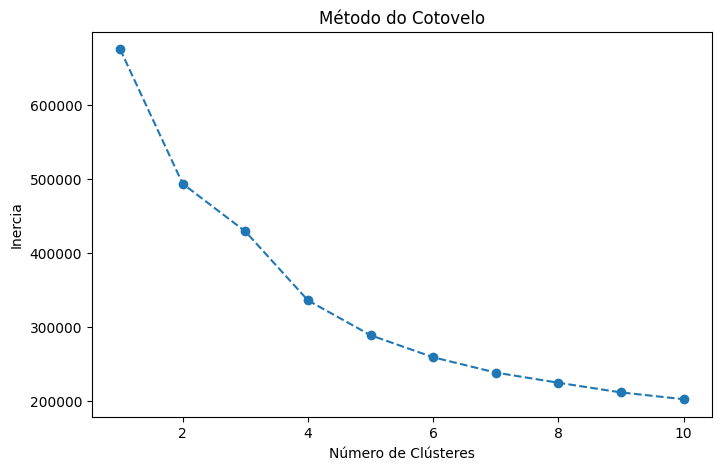

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.title('Método do Cotovelo')
plt.show()

# Treinamento do Modelo K-means com 3 Clusters (valor ótimo de k)

Após a análise da inércia e definição do número ideal de clusters (k=3),
o modelo K-means é treinado com o número de clusters escolhido.
O método fit_predict é usado para ajustar o modelo aos dados escalonados
e, simultaneamente, prever os clusters de cada ponto de dados.

# Visualização dos clusters com PCA (Análise de Componentes Principais)

A PCA é aplicada para reduzir a dimensionalidade dos dados para 2 componentes principais, permitindo que os clusters sejam visualizados em um gráfico 2D. Isso ajuda a entender como os diferentes clusters se distribuem no espaço de características reduzido.

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

df_numeric['Cluster'] = clusters

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

#Gráfico - Clústeres Visualizado con PCA.
O gráfico de dispersão demonstra a segmentação dos dados meteorológicos em três clusters distintos, identificados pelo algoritmo KMeans. A redução de dimensionalidade usando PCA preservou as principais características dos dados, permitindo visualizar padrões relevantes, como a separação das condições climáticas com base em variáveis como temperatura, umidade e pressão. Essa análise pode ser usada para categorizar condições climáticas típicas e apoiar decisões baseadas nos grupos identificados

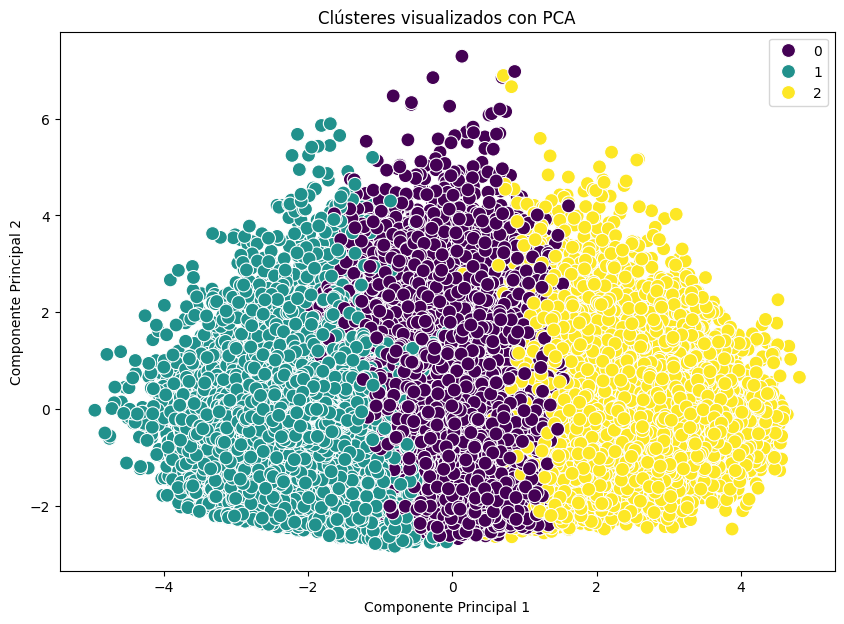

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df_numeric['Cluster'], palette='viridis', s=100)
plt.title('Clústeres visualizados con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

#Silhouette Scores
O Gráfico de Silhouette Score demonstra a qualidade da separação dos clusters para diferentes valores de
𝑘
k (número de clusters). O valor máximo é observado em
𝑘
=
2
k=2, indicando que dois clusters oferecem a melhor separação dos dados. No entanto,
𝑘
=
3
k=3 foi utilizado para a análise devido à sua capacidade de capturar padrões mais complexos e atender aos objetivos específicos do estudo



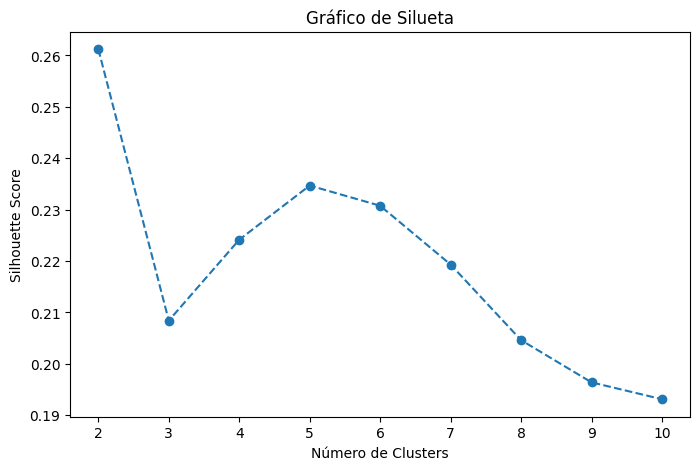

In [ ]:
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), scores, marker='o', linestyle='--')
plt.title("Gráfico de Silueta")
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Score")
plt.show()


#Hipótese:
Clusters específicos representam padrões distintos de clima durante o dia ou à noite - Kmeans

##Variação dos Clusters por Hora do Dia:

O gráfico mostra que há variações significativas na frequência dos clusters em diferentes horas do dia. Isso sugere que os clusters gerados pelo K-means capturam mudanças nos padrões climáticos que ocorrem ao longo do ciclo diário (dia e noite).

##Ciclo de Transição Diurno e Noturno:

Observamos que alguns clusters possuem maior predominância em horários noturnos (ex.: 0h às 6h) e outros predominam durante o período diurno (ex.: 9h às 18h). Isso pode indicar que os fatores climáticos usados como entrada no modelo (temperatura, umidade, etc.) variam significativamente entre dia e noite.

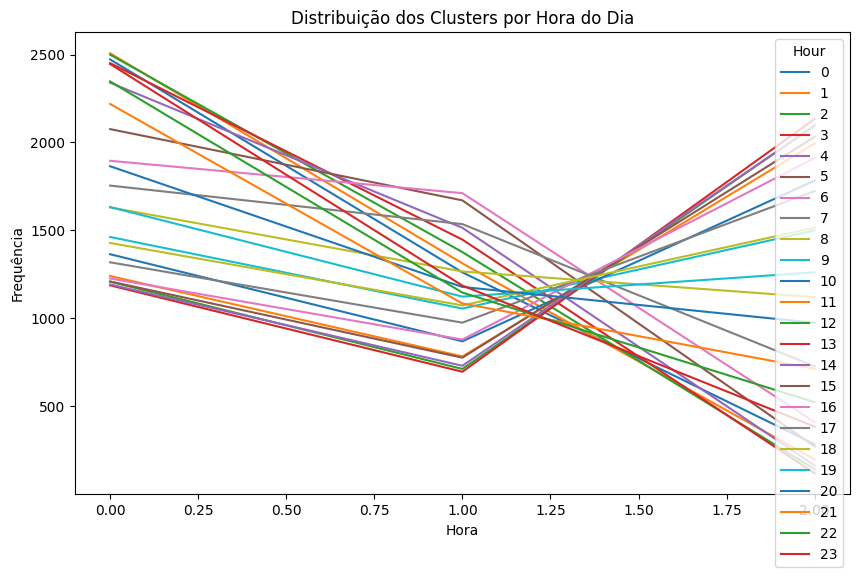

In [ ]:
df_numeric['Date'] = pd.date_range(start='2022-01-01', periods=len(df_numeric), freq='h')
df_numeric['Hour'] = pd.to_datetime(df_numeric['Date']).dt.hour

cluster_hour = df_numeric.groupby(['Cluster', 'Hour']).size().unstack()
cluster_hour.plot(kind='line', figsize=(10, 6))
plt.title("Distribuição dos Clusters por Hora do Dia")
plt.xlabel("Hora")
plt.ylabel("Frequência")
plt.show()

##Módelo DBScan

O gráfico amostra a clusterização aplicada aos dados climáticos utilizando o algoritmo DBSCAN. Aqui

#Resultados da Clusterização
#Clusters Identificados:
O modelo DBSCAN identificou cinco clusters principais:
Cluster 0 (Roxo): O maior cluster, representando a maioria dos dados e associando-se à densidade maior dos padrões climáticos mais frequentes.
Cluster 15 (Azul), Cluster 30 (Ciano), Cluster 45 (Verde-claro), Cluster 60 (Amarelo): Representam grupos menores com características climáticas distintas, embora esses clusters sejam menos densos, destacando padrões climáticos específicos ou menos frequentes.
# Ausência de Ruídos:
Não foram identificados pontos como ruído (-1). Isso indica que todos os dados foram atribuídos a um dos clusters com base nos parâmetros definidos para o DBSCAN.

O modelo DBSCAN foi capaz de identificar clusters representando diferentes padrões climáticos, com uma grande parte dos dados concentrada no Cluster 0 e outros clusters menores representando eventos menos frequentes.
Não há pontos classificados como ruído, o que significa que todos os dados foram agrupados em um dos clusters.

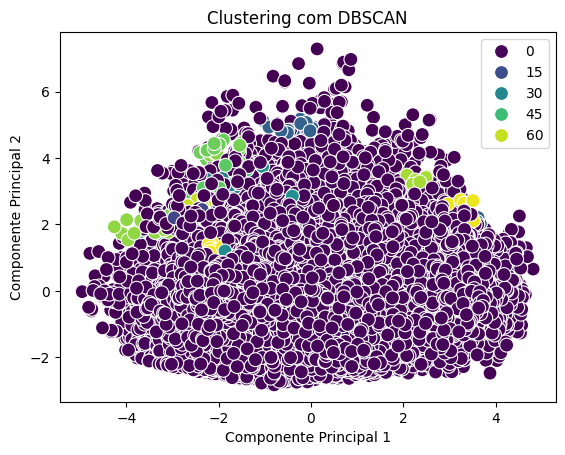

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(df_scaled)

df_numeric['DBSCAN_Cluster'] = labels

sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=labels, palette='viridis', s=100)
plt.title("Clustering com DBSCAN")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


##Módelo TSNE

O gráfico representa a projeção bidimensional dos dados clusterizados utilizando o t-SNE (t-distributed Stochastic Neighbor Embedding). Essa técnica reduz a dimensionalidade dos dados climáticos para um espaço 2D, facilitando a visualização e análise dos clusters formados pelo modelo.

#Validação dos Clusters:

A separação dos grupos no gráfico indica que o modelo de clusterização conseguiu identificar padrões distintos nos dados climáticos.
A análise visual sugere uma boa coerência no agrupamento.
Exploração de Padrões:

O cluster 0 pode representar a densidade maior de eventos climáticos recorrentes.
Clusters 1 e 2 indicam padrões menos frequentes, mas relevantes.

#Componentes:

Componente 1 e Componente 2:
As duas dimensões no gráfico correspondem a projeções não lineares dos dados climáticos, calculadas pelo t-SNE.
Embora essas dimensões não tenham um significado físico direto, elas maximizam a separação visual entre os grupos.


#Confirmação da Clusterização:

O gráfico ajuda a validar visualmente se os clusters definidos pelo modelo fazem sentido em termos de separação e coesão dos grupos.
Clusters bem separados no gráfico indicam uma boa performance do modelo.
Exploração dos Dados:

Pode-se analisar quais grupos possuem maior densidade e quais representam padrões ou eventos climáticos menos frequentes.



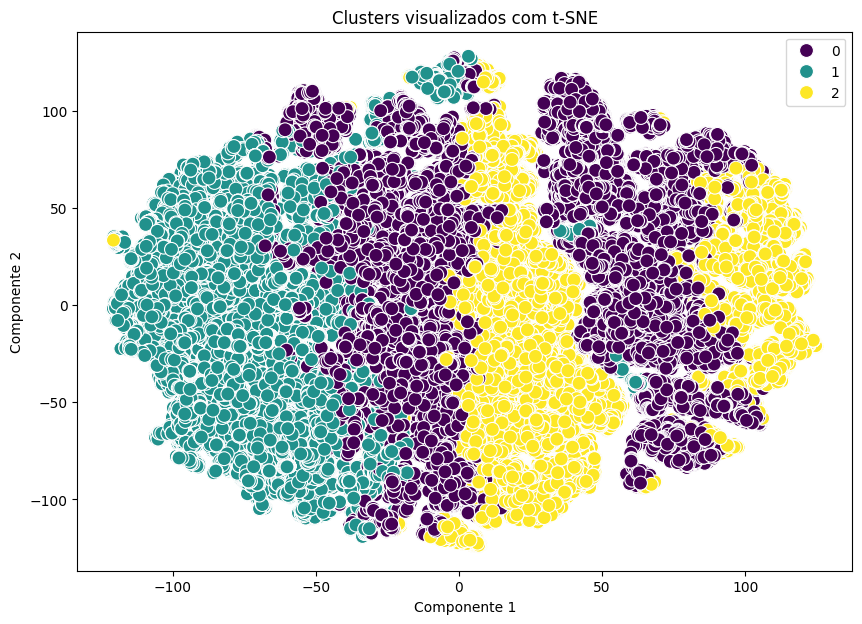

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(df_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_components[:, 0], y=tsne_components[:, 1], hue=df_numeric['Cluster'], palette='viridis', s=100)
plt.title('Clusters visualizados com t-SNE')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.show()


##Módelo DBScan Com PCA

# Clusters Identificados:
O modelo identificou cinco clusters principais com os seguintes rótulos:
Cluster 0 (Roxo): O maior cluster, representando a maioria dos dados e, possivelmente, eventos climáticos mais recorrentes.
Cluster 15 (Azul): Agrupamento menor que sugere características climáticas específicas.
Cluster 30 (Ciano): Cluster intermediário em termos de densidade.
Cluster 45 (Verde-claro): Pode indicar um padrão climático menos frequente.
Cluster 60 (Amarelo): Um grupo pequeno que se destaca, possivelmente associado a eventos mais raros ou extremos.
# Ausência de Ruídos:
Não foram identificados pontos como ruído (-1), indicando que o DBSCAN conseguiu alocar todos os dados em algum cluster com base nos parâmetros configurados.

##Validação da Clusterização:

O gráfico demonstra boa separação entre os clusters, indicando que o DBSCAN conseguiu identificar padrões distintos nos dados climáticos.
O maior cluster (0) concentra os eventos climáticos mais frequentes, enquanto clusters menores representam grupos com padrões específicos.
Exploração de Padrões Climáticos:

Cluster 0: Provavelmente associado às condições climáticas mais frequentes no conjunto de dados.
Clusters 15, 30, 45 e 60: Podem estar relacionados a características menos comuns ou eventos climáticos mais específicos e raros.







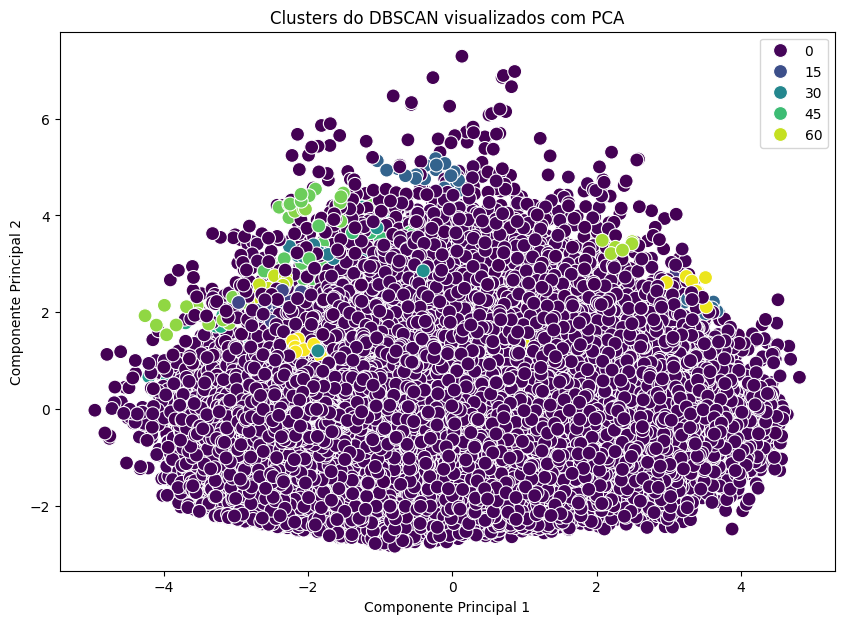

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

df_numeric['DBSCAN_Cluster'] = dbscan_labels

plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df_numeric['DBSCAN_Cluster'], palette='viridis', s=100)
plt.title('Clusters do DBSCAN visualizados com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()